<h1 align="center"> Time Series Data Basics with Pandas Part 2: Price Variation from Pandas groupby </h1>

This code demonstrates how to view time series data in pandas as well as shifting dataframe, groupby datetime (daily, weekly, monthly), and price variation by day, month, year etc.  

**if this tutorial doesn't cover what you are looking for, please leave a comment below the youtube video and I will try to cover what you are interested in.**

<b> Part 1 </b>: Sampling, Rolling Mean (Smoothing), Linear Regression, Filtering, Join, plotting of a Time Series Pandas DataFrame <br>
https://www.youtube.com/watch?v=OwnaUVt6VVE

<b> Part 2 </b>: Price Variation from Pandas GroupBy <br>
https://www.youtube.com/watch?v=1S5UKLqe-gg

<h3 align='Left'> Importing Libraries</h3>

In [14]:
%pip install pandas_datareader
%pip install yfinance
import yfinance as yf

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
                                              0.0/101.1 kB ? eta -:--:--
     -------------------------------------- 101.1/101.1 kB 5.7 MB/s eta 0:00:00
                                              0.0/64.9 kB ? eta -:--:--
     ---------------------------------------- 64.9/64.9 kB ? eta 0:00:00
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
                                              0.0/939.5 kB ? eta -:--:--
     ------------------------------------- 939.5/939.5 kB 30.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Created wheel for peewee: filena

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires PyYAML==6.0, but you have pyyaml 6.0.1 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.
spyder 5.4.3 requires jedi<0.19.0,>=0.17.2, but you have jedi 0.19.0 which is incompatible.


<h3 align='Left'> Getting Data and Viewing with Pandas </h3>

In [15]:
from datetime import datetime  # Import only datetime from datetime module

start = '2009-03-14'
end = '2016-04-14'

# Fetch Google stock data using yfinance
google = yf.download('GOOG', start=start, end=end)

# Drop the 'Volume' column for simplicity (optional)
google = google.drop('Volume', axis=1)

# Display the first few rows of data
print(google.head())

[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open
Ticker                         GOOG      GOOG      GOOG      GOOG      GOOG
Date                                                                       
2009-03-16 00:00:00+00:00  7.942899  7.962405  8.212468  7.935008  8.119317
2009-03-17 00:00:00+00:00  8.331733  8.352194  8.352194  7.947461  7.974609
2009-03-18 00:00:00+00:00  8.276078  8.296403  8.468259  8.170624  8.338993
2009-03-19 00:00:00+00:00  8.197566  8.217698  8.368632  8.153937  8.261036
2009-03-20 00:00:00+00:00  8.203032  8.223178  8.293663  8.128034  8.226664


<h3 align='Left'> Calculate Daily Price Variation </h3>
<br> Daily price variation of a stock is the difference between the highest and lowest values on a given trading day. 

In [16]:
daily_shift = (google['High'] - google['Low'])
daily_shift = pd.DataFrame(data = daily_shift, columns = ['Daily Price Variation'])
daily_shift.head()

,Daily Price Variation
Date,
2009-03-16 00:00:00+00:00,NaN
2009-03-17 00:00:00+00:00,NaN
2009-03-18 00:00:00+00:00,NaN
2009-03-19 00:00:00+00:00,NaN
2009-03-20 00:00:00+00:00,NaN


<h3 align='Left'> Calculate Daily Price Variation </h3>

Daily price variation may also refer to the difference between one day's opening price and the next day's opening price. 

This is according to: http://finance.zacks.com/calculate-daily-price-variation-stocks-8299.html

In [17]:
# Notice that the first output is a nan because shift moves 
# the original dataframe down by one index
google['Open'].shift(1).head()

Ticker,GOOG
Date,
2009-03-16 00:00:00+00:00,NaN
2009-03-17 00:00:00+00:00,8.119317
2009-03-18 00:00:00+00:00,7.974609
2009-03-19 00:00:00+00:00,8.338993
2009-03-20 00:00:00+00:00,8.261036


In [18]:
ndaily_shift = (google['Open'] - google['Open'].shift(1))
ndaily_shift = pd.DataFrame(data = ndaily_shift)
ndaily_shift.columns = ['Daily Price Variation'] # renaming column
ndaily_shift.head()

,Daily Price Variation
Date,
2009-03-16 00:00:00+00:00,NaN
2009-03-17 00:00:00+00:00,-0.144708
2009-03-18 00:00:00+00:00,0.364384
2009-03-19 00:00:00+00:00,-0.077957
2009-03-20 00:00:00+00:00,-0.034372


In [19]:
# Removing indexes with nan
ndaily_shift = ndaily_shift.dropna()
ndaily_shift.head()

,Daily Price Variation
Date,
2009-03-17 00:00:00+00:00,-0.144708
2009-03-18 00:00:00+00:00,0.364384
2009-03-19 00:00:00+00:00,-0.077957
2009-03-20 00:00:00+00:00,-0.034372
2009-03-23 00:00:00+00:00,0.081197


<h3 align='Left'> Calculate Monthly Price Variation</h3>

In [20]:
# find price max in a given month
google.groupby(pd.TimeGrouper(freq='M')).max().head()

AttributeError: module 'pandas' has no attribute 'TimeGrouper'

In [ ]:
# find price min in a given month
google.groupby(pd.TimeGrouper(freq='M')).min().head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-03-31,159.93,164.70,159.14,159.69,NaN
2009-04-30,171.72,177.44,170.13,176.87,NaN
2009-05-31,194.21,195.91,192.15,193.56,NaN
2009-06-30,203.12,204.29,200.74,202.64,NaN
2009-07-31,199.80,202.80,197.79,198.12,NaN


In [ ]:
month_groupby = google.groupby(pd.TimeGrouper(freq='M'))
month_difference = (month_groupby['Open'].max() - month_groupby['Open'].min())
month_difference = pd.DataFrame(data = month_difference)
month_difference.columns = ['Monthly Price Variation']
month_difference.head()

,Monthly Price Variation
Date,
2009-03-31,16.46
2009-04-30,25.96
2009-05-31,11.64
2009-06-30,19.19
2009-07-31,24.97


In [ ]:
year_groupby = google.groupby(pd.TimeGrouper(freq='A'))
year_difference = (year_groupby['Open'].max() - year_groupby['Open'].min())
year_difference = pd.DataFrame(data = year_difference)
year_difference.columns = ['Yearly Price Variation']
year_difference.head()

,Yearly Price Variation
Date,
2009-12-31,152.13
2010-12-31,95.74
2011-12-31,84.25
2012-12-31,105.08
2013-12-31,207.63


<h3 align='Left'> Volume by Month </h3>

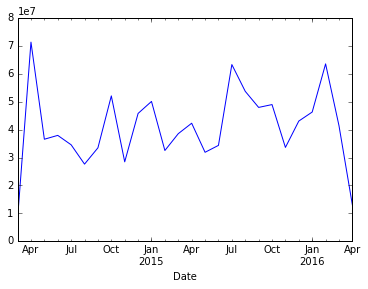

In [ ]:
# Annual time grouper ('A'). We could also use monthly (M), quarterly (Q), or weekly (W).
#google.groupby(pd.TimeGrouper(freq='M'))
month_volume = google['Volume'].groupby(pd.TimeGrouper(freq='M')).sum().dropna()
month_volume = pd.DataFrame(data = month_volume)
month_volume = month_volume.reset_index()
month_volume.plot('Date', 'Volume', legend = None);

<h3 align='Left'> Plotting Price Variation by Day, Month, Year </h3>

In [ ]:
# making a Date Column
google = google.reset_index()
daily_shift = daily_shift.reset_index()
month_difference = month_difference.reset_index()
year_difference = year_difference.reset_index()
google.head()

,Date,Open,High,Low,Close,Volume
0,2009-03-16,162.83,164.70,159.14,159.69,NaN
1,2009-03-17,159.93,167.50,159.39,167.50,NaN
2,2009-03-18,167.24,169.83,163.86,166.38,NaN
3,2009-03-19,165.67,167.83,163.53,164.81,NaN
4,2009-03-20,164.98,166.33,163.01,164.91,NaN


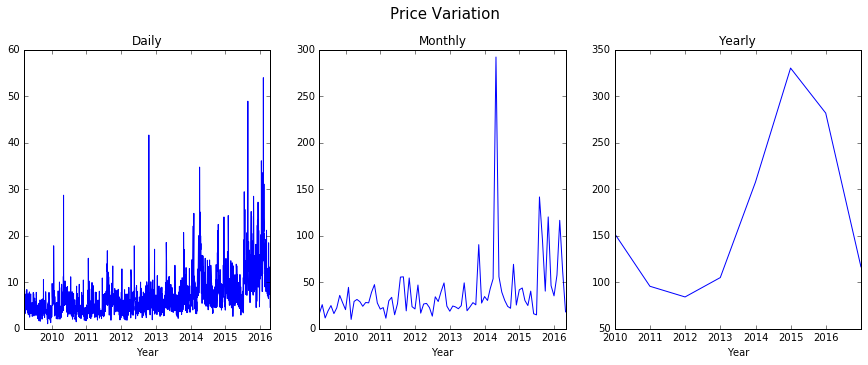

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
fig.suptitle('Price Variation', size = 15, x = .515, y=1.02)
axes[0].plot('Date', 'Daily Price Variation', data = daily_shift);
axes[0].set_title('Daily');
axes[0].set_xlabel('Year', fontsize=10);
axes[1].plot('Date', 'Monthly Price Variation', data = month_difference);
axes[1].set_title('Monthly');
axes[1].set_xlabel('Year', fontsize=10);
axes[2].plot('Date', 'Yearly Price Variation', data = year_difference);
axes[2].set_title('Yearly');
axes[2].set_xlabel('Year', fontsize=10);